In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.multiclass
import sklearn.linear_model
% matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
crime_df = df.ix[df['relevant'], :]
print(crime_df.shape)
crime_df = crime_df.ix[crime_df.loc[:, 'OEMC':'TASR'].any(1), :]
print(crime_df.shape)

idx = np.random.permutation(crime_df.shape[0])
trn = crime_df.iloc[idx[:int(crime_df.shape[0] * 0.7)], :]
tst = crime_df.iloc[idx[int(crime_df.shape[0] * 0.7):], :]
print(trn.shape)
print(tst.shape)

(112091, 45)
(34253, 45)
(23977, 45)
(10276, 45)


In [4]:
# vectorize data
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(trn['bodytext'].values)

Y = trn.loc[:, 'OEMC':'TASR'].values

In [5]:
X.shape

(23977, 118167)

In [13]:
clf = sklearn.multiclass.OneVsRestClassifier(
    sklearn.ensemble.LogisticRegression()
)
clf.fit(X, Y)

AttributeError: module 'sklearn' has no attribute 'ensemble'

In [7]:
X_tst = vectorizer.transform(tst['bodytext'].values)
Y_tst = tst.loc[:, 'OEMC':'TASR'].values

Y_hat = clf.predict_proba(X_tst)

In [8]:
perf = pd.DataFrame()

for i in range(Y_hat.shape[1]):
    tag = tst.columns[7+i]
    perf.loc['TP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 1))
    perf.loc['FP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 0))
    perf.loc['TN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 0))
    perf.loc['FN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 1))
    perf.loc['TPR', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FN', tag])
    perf.loc['FPR', tag] = perf.loc['FP', tag] / (perf.loc['FP', tag] + perf.loc['TN', tag])
    perf.loc['PPV', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FP', tag])

perf = perf.T
perf

,TP,FP,TN,FN,TPR,FPR,PPV
OEMC,7.0,5.0,10228.0,36.0,0.162791,0.000489,0.583333
CPD,4434.0,1100.0,3882.0,860.0,0.837552,0.220795,0.801229
SAO,602.0,238.0,9026.0,410.0,0.594862,0.025691,0.716667
CCCC,346.0,240.0,9318.0,372.0,0.481894,0.025110,0.590444
CCJ,100.0,51.0,10008.0,117.0,0.460829,0.005070,0.662252
CCSP,224.0,87.0,9812.0,153.0,0.594164,0.008789,0.720257
CPUB,16.0,11.0,10209.0,40.0,0.285714,0.001076,0.592593
IDOC,33.0,20.0,10169.0,54.0,0.379310,0.001963,0.622642
DOMV,319.0,105.0,9654.0,198.0,0.617021,0.010759,0.752358
SEXA,636.0,66.0,9451.0,123.0,0.837945,0.006935,0.905983


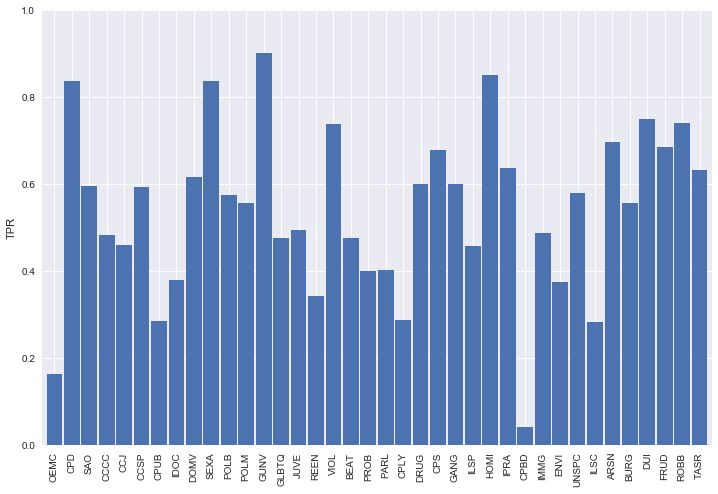

In [9]:
perf['TPR'].plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('TPR');

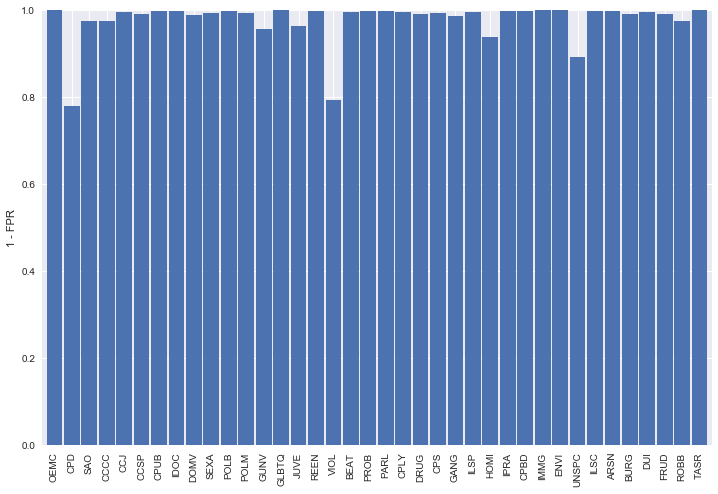

In [10]:
(1 - perf['FPR']).plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('1 - FPR');

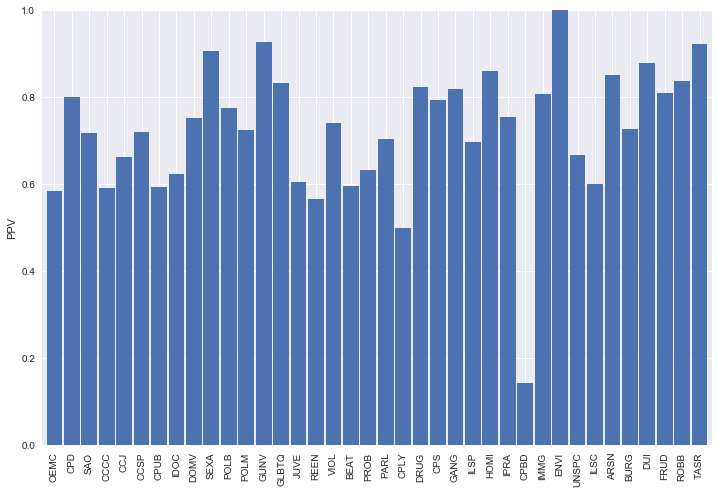

In [11]:
perf['PPV'].plot(kind='bar', ylim=[0,1], width=0.9)
plt.ylabel('PPV');

In [ ]:
import benchmark_tagging as bt

In [ ]:
benchmark_out = bt.benchmark(
    lambda: sklearn.multiclass.OneVsRestClassifier(
        sklearn.linear_model.LogisticRegression()
    ),
    vectorizer.transform(crime_df['bodytext'].values),
    crime_df.loc[:, 'OEMC':'TASR'].values
)

print(benchmark['acc'])
print(benchmark['acc'].mean())